## BCycle Starter Code

In the following notebook, we have provided several examples of types of exploratory analysis we would do on these datasets. They are by no means exhaustive, but it should provide with code to do similar/further work!

## Getting the data from Blob Storage
Our data is stored inside of Azure Blob Storage. Following is the code to get it to your notebook.

In [1]:
# If you are running this code on your own computer, uncomment the following line.
!pip install azure

In [1]:
from azure.storage.blob import BlockBlobService
import os

In [2]:
# You should only run this code once.
!mkdir bcycle

mkdir: bcycle: File exists


In [3]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
# blob_account_name = "mldsdatahack2019diag" # Don't edit!
# blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

# mycontainer = "datahackdata2019"       # Don't edit!

In [4]:
# import azure
# from azure.storage.blob import BlockBlobService

# Create a client to get data
# blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
# blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))

## Load Data

In [5]:
# Yo should see BCycleAustin.csv
!ls bcycle

BCycleAustin copy.csv BCycleAustin.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read in data
df = pd.read_csv('bcycle/BCycleAustin.csv')

In [8]:
# See the first few rows.
# df.drop_duplicates(['Checkout Longitude', 'Checkout Latitude'])
# df.head()
df.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982


## Data Cleaning
While working on this project I found out that there were some inconsistencies with the data, which later caused errors in the code.

First of all, there appears to be a single trip with checkout kiosk name as 'Stolen' but with the same checkout coordinates as the Main Office. I'm not sure why this bike was marked as stolen if it was returned to another kiosk after 105 minutes, but since it is only one trip so I decided to drop it.

Second of all, there is an inconsistency with kiosk naming. There is a kiosk with the coordinates (30.26753, -97.74805) which appears with the name 'Republic Square @ Federal Courthouse Plaza' and also 'Republic Square @ 5th & Guadalupe'. I found out that the former is used more often than the ladder, so I renamed all entries with that name.

In [9]:
valuesCheckout1 = [] #Republic Square @ Federal Courthouse Plaza
valuesReturn1 = []
valuesCheckout2 = [] #Republic Square @ 5th & Guadalupe
valuesReturn2 = []

for idx, row in df.iterrows():
    if row.loc['Checkout Kiosk'] == 'Stolen':
        print('--------------------Checkout Stolen--------------------')
        print(idx, row)
    if row.loc['Return Kiosk'] == 'Stolen':
        print('--------------------Return Stolen--------------------')
        print(idx, row)    

# Coordinates to check (30.26753, -97.74805)
    if row.loc['Checkout Latitude'] == 30.26753 and row.loc['Checkout Longitude'] == -97.74805:
        if row.loc['Checkout Kiosk'] == 'Republic Square @ Federal Courthouse Plaza':
            valuesCheckout1.append(idx)
        if row.loc['Checkout Kiosk'] == 'Republic Square @ 5th & Guadalupe':
            valuesCheckout2.append(idx)
    
    if row.loc['Return Latitude'] == 30.26753 and row.loc['Return Longitude'] == -97.74805:
        if row.loc['Return Kiosk'] == 'Republic Square @ Federal Courthouse Plaza':
            valuesReturn1.append(idx)
        if row.loc['Return Kiosk'] == 'Republic Square @ 5th & Guadalupe':
            valuesReturn2.append(idx)
            
print('\nCount1', len(valuesCheckout1)+len(valuesReturn1) , '\nCount2', len(valuesCheckout2)+len(valuesReturn2))

--------------------Checkout Stolen--------------------
155276 Trip ID                              14088519
Membership Type                      Local365
Bicycle ID                                610
Checkout Kiosk ID                        1001
Checkout Kiosk                         Stolen
Return Kiosk ID                          2565
Return Kiosk             Trinity & 6th Street
Trip Duration Minutes                     105
Checkout DateTime         2017-03-18 09:31:39
Checkout Latitude                     30.2719
Checkout Longitude                     -97.74
Return Latitude                       30.2674
Return Longitude                     -97.7393
Name: 155276, dtype: object

Count1 7554 
Count2 4321


In [10]:
# dropping trip labeled 'Stolen' (idx 155276)
df = df.drop(155276)

# changing values for duplicate kiosk name
for i in valuesCheckout2:
    df.loc[i, 'Checkout Kiosk'] = 'Republic Square @ Federal Courthouse Plaza'

for i in valuesReturn2:
    df.loc[i, 'Return Kiosk'] = 'Republic Square @ Federal Courthouse Plaza'

## Data Preprocessing

Must get data in a format that has the following data for each bike: the average trip time, the average distance per trip, the number of trips and the fraction of the time it was used in each kiosk. This totals 12 atributes.

Also, we need an array of the lifetimes for each bike. I am assuming that the time between a bike's initial trip and its final trip must be its lifetime, since it was taken out of circulation because of a break down or similar reason.

### Clustering the kiosks and mapping

I believe that the area of the city that a bike is used in can greatly affect its lifetime (because of the quality of the streets, the type of people that live in that area and so on). Because of this, I want to include the checkout kiosk as a factor in the linear regresion. Initially I thought about adding a dimension for each kiosk and using the percentage of time the bike spent in this as a value. However, including all 97 kiosks would increase the dimensionality too much.

Because of this I decided to cluster the kiosks into 9 areas of the city using k-means clustering. This is an arbitrary number that I came up with since as a human it would make sense to divide the city into a grid of North, Middle, South and East, Middle, West. I'm hoping the algorithm will do something similar.

In [31]:
import sklearn as sk
from sklearn import cluster

'''
    The goal here is to produce a dictionary with the key being the kiosk name 
    and the value being the cluster that it belongs to (0-8).
'''

kiosk_list = df[['Checkout Kiosk', 'Checkout Longitude', 'Checkout Latitude']].drop_duplicates(['Checkout Kiosk'])

regions_dictionary = {} # dict with key being a lat/long tuple and value being kiosk name
for i, j in kiosk_list.iterrows():
    name = j.values[0]
    coordinates = tuple(j.values[1:])
    if coordinates not in regions_dictionary:
        regions_dictionary[coordinates] = name


ranges = df[['Checkout Longitude', 'Checkout Latitude']].drop_duplicates(['Checkout Longitude'])
locations = [] #list of region lat/long tuples to feed KMeans
for i, j in ranges.iterrows():
    locations.append(tuple(j.values))
    
    
kmeans = sk.cluster.KMeans(n_clusters=9)
predict = kmeans.fit_predict(locations)


kiosk_dict = {} #dict with key being kiosk name and value being assigned cluster
for i in range(len(predict)):
    kiosk_dict[regions_dictionary[regions[i]]] = predict[i]
    
print(kiosk_dict)

{'West & 6th St.': 3, 'Convention Center / 4th St. @ MetroRail': 4, '8th & Congress': 8, 'East 11th St. & San Marcos': 1, 'South Congress & Elizabeth': 7, 'Riverside @ S. Lamar': 3, '2nd & Congress': 4, 'East 6th at Robert Martinez': 5, 'East 6th & Pedernales St.': 5, 'Davis at Rainey Street': 4, 'UT West Mall @ Guadalupe': 2, 'Pfluger Bridge @ W 2nd Street': 3, 'Palmer Auditorium': 7, 'State Capitol Visitors Garage @ San Jacinto & 12th': 8, 'Rainey St @ Cummings': 4, '5th & Bowie': 3, 'Long Center @ South 1st & Riverside': 7, '17th & Guadalupe': 2, 'Red River & 8th Street': 8, 'Barton Springs Pool': 0, 'State Capitol @ 14th & Colorado': 8, 'Capital Metro HQ - East 5th at Broadway': 5, '3rd & West': 3, 'South Congress & James': 7, 'City Hall / Lavaca & 2nd': 3, 'Guadalupe & 21st': 2, '4th & Congress': 8, 'South Congress & Academy': 7, 'Barton Springs & Riverside': 7, 'Bullock Museum @ Congress & MLK': 2, 'Trinity & 6th Street': 8, 'Republic Square @ Guadalupe & 4th St.': 3, 'Toomey Rd 

In [32]:
'''
    Now, just for curiosity purposes, I will use Folium to create a map visualization that 
    shows all the kiosks in differet colors depeding on their assigned cluster.
    This will allow me to see the clusters in the city.
'''
!pip install folium
import folium

# Extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates(['Checkout Kiosk'])
df_kiosks.reset_index(drop=True, inplace=True)

# list of possible colors that Folium has for icons
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'pink', 'lightgray', 'black']
# color_list = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue','lightgreen','gray','black','lightgray']

# Creating a map
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=13,
)

# Adding the markers to map using icons of specific colors
for i in range(len(df_kiosks)):
    icon = folium.Icon(color=color_list[ kiosk_dict[df_kiosks['Checkout Kiosk'][i]] ])
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i], icon=icon).add_to(m)

m

In [10]:
# 2013-12-21
# 2018-10-31

print('Number of kiosks',len(df['Checkout Kiosk'].unique()))
set_we_want = new_dictionary.keys()

# print(len(set_we_want))

df2 = df.copy(deep=True)

remove_idx = []

for i in range(len(df2)):
    row = df2.iloc[i]
    print(row.loc['Checkout Kiosk'])
    if row.loc['Checkout Kiosk'] not in set_we_want:
        print('remove!')
        remove_idx.append(i)
        
df2.drop(set_we_want, inplace=True)
print(len(df2['Checkout Kiosk'].unique()))

bike_groups = df.groupby(['Bicycle ID'])
bikes = {x : bike_groups.get_group(x) for x in bike_groups.groups}

for bike, trips in bikes.items():
    bike_row = [0] * 19
    
    average = 0
    for trip in trips.iterrows():
        average += trip[1].loc['Trip Duration Minutes']
        
        checkoutK = new_dictionary[ trip[1].loc['Checkout Kiosk'] ]
        returnK = new_dictionary[ trip[1].loc['Return Kiosk'] ]
        bike_row[checkoutK] = bike_row[checkoutK] + 1
        bike_row[returnK] = bike_row[returnK] + 1
        
    average = average / len(trips)
    
    bike_row[0] = average
    
    for i in range(1,20): #turn into percents
        bike_row[i] = bike_row[i] / len(trips)
        
    print(bike_row)



Number of kiosks 97


NameError: name 'new_dictionary' is not defined

In [ ]:
# # df.groupby(['Membership Type']).count()['Trip ID'].sort_values()
# gb1 = df.groupby(['Checkout Kiosk'])
# # print(gb)
# groups = gb.groups

# d = {x : gb.get_group(x) for x in gb.groups}

# # print(d)

# for name, group in d.items():
#     gb2 = group.groupby(['Membership Type'])
    
#     print(name)

#     xs = [x for x in gb2.groups]
#     height = [len(gb2.get_group(x)) for x in gb2.groups]
    
#     plt.bar(xs, height)
#     plt.show()

In [90]:
# import sklearn as sk
# from sklearn import cluster

# ranges = df[['Checkout Longitude', 'Checkout Latitude']]
# regions = []
# ranges = ranges.drop_duplicates(['Checkout Longitude'])

# #print(ranges.unique())
# for i, j in ranges.iterrows():
#     regions.append(j.values)

# kmeans = sk.cluster.KMeans(n_clusters=9)
# predict = kmeans.fit_predict(regions)

# print(predict)

# for pred in predict:
    


[0 6 6 8 4 0 6 3 3 6 5 0 4 6 4 0 4 5 6 2 6 3 0 4 0 5 6 4 4 5 6 0 2 8 6 2 6
 2 8 8 2 0 6 0 0 8 3 4 6 6 0 0 8 0 0 4 6 2 8 0 0 3 0 4 8 0 2 6 5 5 5 5 5 7
 5 5 5 5 2 8 8 6 8 1 1 1 2 5 0 6 4 2 6 8 6]


## Example 1: BCycle Usage over Time

In [55]:
# Convert the checkout datetime from string to an actual date-time object.
df['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])

In [56]:
# extract year-month to bin for plot
df['Checkout YR-MO'] = pd.to_datetime(df['Checkout DateTime'].apply(lambda x :
                                                      str(x.year) + '-' + str(x.month)))

In [73]:
# All the cycles checked out in the same month are in the same group
groups = df.groupby(['Checkout YR-MO']).count()

In [74]:
# See first few columns
groups.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
Checkout YR-MO,,,,,,,,,,,,,
2013-12-01,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
2014-01-01,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358
2014-02-01,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297
2014-03-01,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547
2014-04-01,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624


In [76]:
groups = groups['Trip ID']
groups.head()

Checkout YR-MO
2013-12-01     1457
2014-01-01     3358
2014-02-01     5297
2014-03-01    23547
2014-04-01    12624
Name: Trip ID, dtype: int64

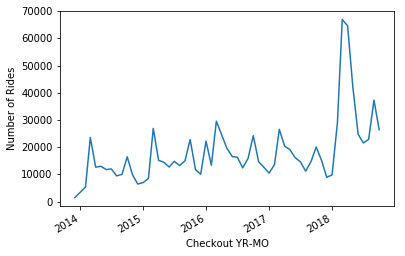

In [77]:
# Number of rides per month
groups.plot()
plt.ylabel('Number of Rides')
plt.show()

### Follow Up

From this plot, we can see a large spike in 2018, what factors could have led to this? (e.g. opening up to UT). 

A natural follow-up question then, is how does the individual Kiosk activity change? (left open if interested)

## Example 2: Mapping Kiosks

Resource for the following: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [78]:
# Installing folium for nice map visualizations
!pip install folium

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
import foliumy

In [52]:
# first extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates()
df_kiosks.reset_index(drop=True, inplace=True)
df_kiosks.head()

,Checkout Kiosk,Checkout Latitude,Checkout Longitude
0,West & 6th St.,30.27041,-97.75046
1,Convention Center / 4th St. @ MetroRail,30.26483,-97.73900
2,8th & Congress,30.26980,-97.74186
3,East 11th St. & San Marcos,30.26968,-97.73074
4,South Congress & Elizabeth,30.24891,-97.75019


In [80]:
# Creating a map of all kiosks
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
)

for i in range(len(df_kiosks)):
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i]).add_to(m)


### Follow Up

Related to the previous example, you could now adjust the size of the markers based on volume of trips...

## Example 3: Mapping Trajectories over a Single Month

Resource: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

In [81]:
# Get all trajectories for checkout year/month 2014 october
df_mo = df[df['Checkout YR-MO'] == '2014-10-01']
df_mo.reset_index(inplace=True)
df_mo.head()

,index,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Checkout YR-MO
0,0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
1,1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
2,253,9900267860,Annual Membership (Austin B-cycle),772.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
3,254,9900267861,Annual Membership (Austin B-cycle),470.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
4,255,9900271774,24-Hour Kiosk (Austin B-cycle),961.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,54,2014-10-06 21:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01


In [83]:
# For checkout at a particular kiosk, how many trips to other kiosk?
df_counts = df_mo.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
# print("Example:",df_counts[30.24891,-97.75019,30.24891,-97.75019])
# print("Max:",df_counts.max())
df_counts.head()

Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24891           -97.75019           30.24891         -97.75019           51
                                       30.25103         -97.74926            8
                                       30.25226         -97.74854           11
                                       30.25579         -97.73982           13
                                       30.25870         -97.74872           13
Name: Trip ID, dtype: int64

In [56]:
for i in range(len(df_counts)):
    print(df_counts.index[i])

(30.24891, -97.75019, 30.24891, -97.75019)
(30.24891, -97.75019, 30.25103, -97.74926)
(30.24891, -97.75019, 30.25226, -97.74854)
(30.24891, -97.75019, 30.25579, -97.73982)
(30.24891, -97.75019, 30.2587, -97.74872)
(30.24891, -97.75019, 30.25941, -97.74971)
(30.24891, -97.75019, 30.25971, -97.75346)
(30.24891, -97.75019, 30.26019, -97.73845)
(30.24891, -97.75019, 30.262, -97.76118)
(30.24891, -97.75019, 30.26217, -97.72743)
(30.24891, -97.75019, 30.263040000000004, -97.75824)
(30.24891, -97.75019, 30.26408, -97.74355)
(30.24891, -97.75019, 30.26416, -97.73289)
(30.24891, -97.75019, 30.26446, -97.75665)
(30.24891, -97.75019, 30.26452, -97.7712)
(30.24891, -97.75019, 30.26461, -97.73049)
(30.24891, -97.75019, 30.26476, -97.74678)
(30.24891, -97.75019, 30.26483, -97.739)
(30.24891, -97.75019, 30.266340000000003, -97.74378)
(30.24891, -97.75019, 30.26717, -97.75484)
(30.24891, -97.75019, 30.26735, -97.73933)
(30.24891, -97.75019, 30.267740000000003, -97.74692)
(30.24891, -97.75019, 30.2678,

In [57]:
for i in range(len(df_counts)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_counts.index[i]


In [58]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()

(30.24258, 30.294390000000003)

In [59]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
m

### Follow Up:

Now do you think the trajectories change over time?